In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load dataset
df = pd.read_csv("/content/heart.csv")


In [3]:
# Step 1: Define features and target
X = df.drop('target', axis=1)
y = df['target']

In [4]:
# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 3: Train Decision Tree Classifier (default)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

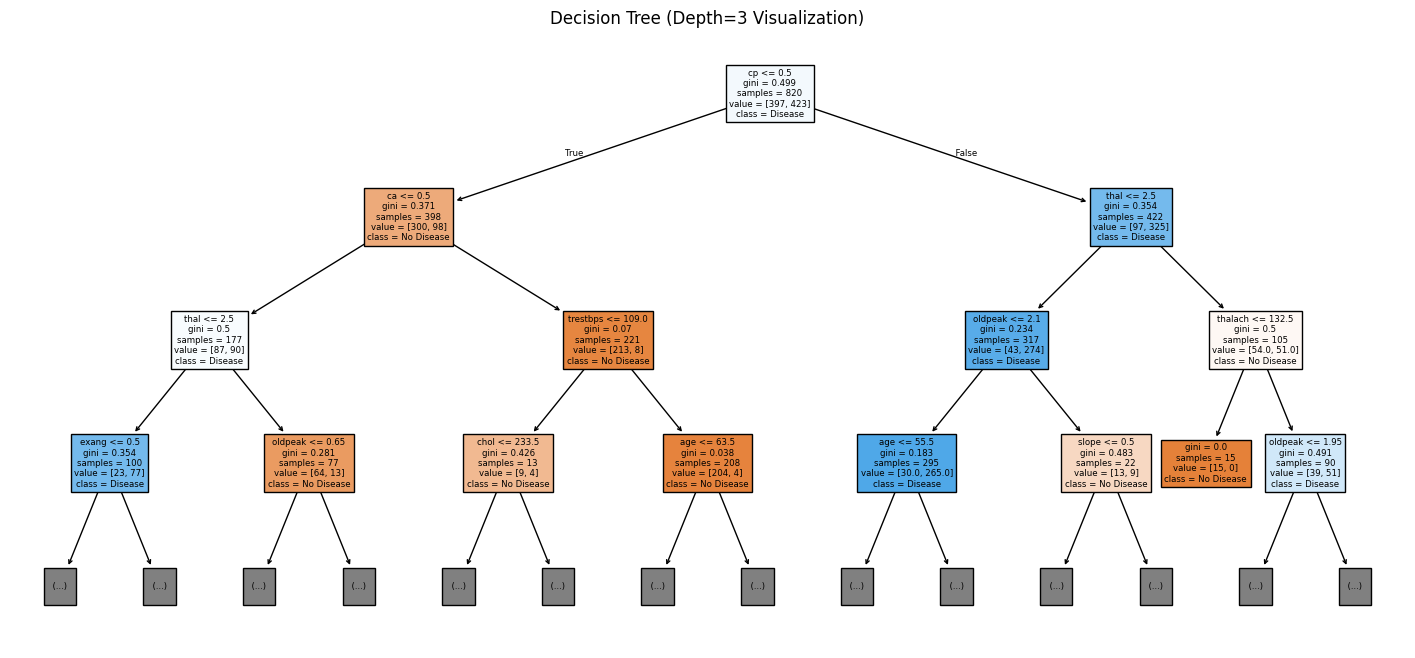

In [6]:
# Step 4: Visualize Decision Tree (limited to depth=3 for clarity)
plt.figure(figsize=(18, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"], max_depth=3)
plt.title("Decision Tree (Depth=3 Visualization)")
plt.show()

In [7]:
# Step 5: Evaluate Decision Tree
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Default Decision Tree Accuracy:", acc_dt)
print("\nClassification Report (Default Tree):\n", classification_report(y_test, y_pred_dt))


Default Decision Tree Accuracy: 0.9853658536585366

Classification Report (Default Tree):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [8]:
# Step 6: Pruned Decision Tree (to avoid overfitting)
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_dt_pruned = dt_pruned.predict(X_test)
acc_dt_pruned = accuracy_score(y_test, y_pred_dt_pruned)
print("\nPruned Decision Tree Accuracy (max_depth=4):", acc_dt_pruned)



Pruned Decision Tree Accuracy (max_depth=4): 0.8


In [9]:
# Step 7: Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", acc_rf)
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.9853658536585366

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [10]:
# Step 8: Feature Importance (from Random Forest)
importances = rf.feature_importances_
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


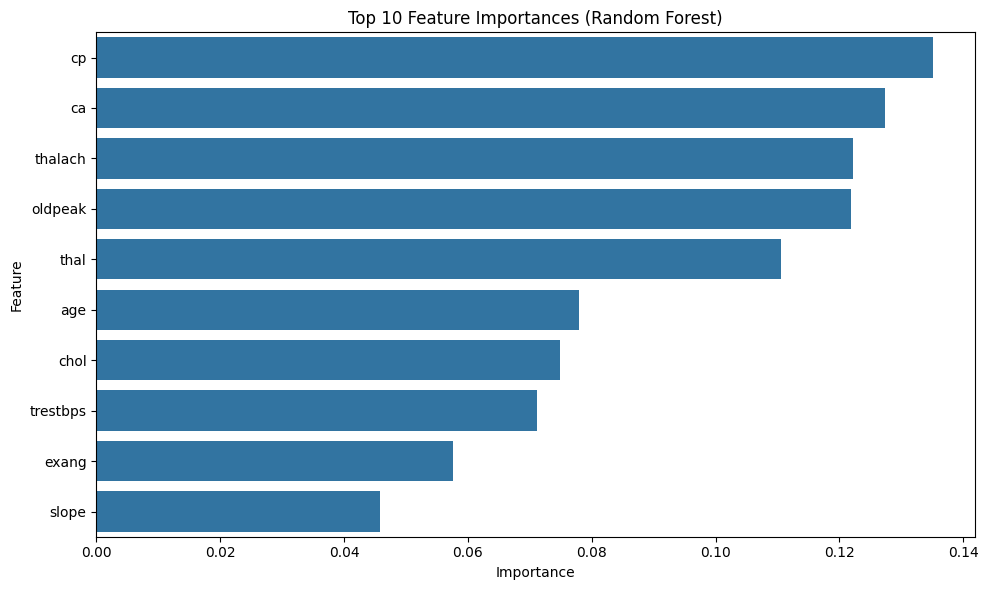

In [11]:
# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

In [12]:
# Step 9: Cross-validation accuracy (5-fold)
cv_dt = cross_val_score(dt_pruned, X, y, cv=5)
cv_rf = cross_val_score(rf, X, y, cv=5)
print("\nCross-validation Accuracy (Decision Tree):", cv_dt.mean())
print("Cross-validation Accuracy (Random Forest):", cv_rf.mean())


Cross-validation Accuracy (Decision Tree): 0.8341463414634147
Cross-validation Accuracy (Random Forest): 0.9970731707317073
